In [1]:
import mysql.connector
import time
import numpy as np
import matplotlib.pyplot as plt
from jupyterlab.browser_check import test_flags

from numpy.ma.extras import average

from seeding_scripts import *

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="password"
)
cursor = conn.cursor()

In [18]:
def plotter(datasets, test_id):
    markers = {0: '.', 1: 'x', 2: 'o', 3: '*', 4: 's'}
    colors = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple', 4: 'pink'}
    plt.figure(figsize=(10, 6))
    
    for index, dataset in enumerate(datasets):
        d = np.sort(dataset)
        c = np.arange(1, len(d) + 1) / len(d)
        plt.plot(d, c, markers[index], color=colors[index], linewidth=1.5, markersize=4, label=f"Dataset {index}")
        print(f"The 50th percentile of {test_id} with {index} is " + str(np.percentile(d, 50)))
        print(f"The 99th percentile of {test_id} with {index} is " + str(np.percentile(d, 99)))

    plt.xlabel('Query Times')
    plt.ylabel('CDF')
    plt.title('Query Time CDF of ' + test_id)
    plt.grid()
    plt.legend()
    plt.xscale('log')
    plt.show()

In [3]:
#########################################################
# NO OPTIMIZATION
#########################################################

setup_prod(cursor, conn)

# Test 1
test1_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 11, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test1_data.append(end_time - start_time)
        cursor.fetchall()

# Test 2
test2_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 22, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test2_data.append(end_time - start_time)
        cursor.fetchall()
# Test 3
test3_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 1, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test3_data.append(end_time - start_time)
        cursor.fetchall()

In [4]:
#########################################################
# WITH OPTIMIZATION 1
#########################################################
setup_prod_opt(cursor, conn, "optimization1.sql")

# Test 1
test1opt1_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 11, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test1opt1_data.append(end_time - start_time)
        cursor.fetchall()

# Test 2
test2opt1_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 22, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test2opt1_data.append(end_time - start_time)
        cursor.fetchall()

# Test 3
test3opt1_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 1, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test3opt1_data.append(end_time - start_time)
        cursor.fetchall()

In [5]:
#########################################################
# WITH OPTIMIZATION 2
#########################################################
setup_prod_opt(cursor, conn, "optimization2.sql")

# Test 1
test1opt2_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 11, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test1opt2_data.append(end_time - start_time)
        cursor.fetchall()

# Test 2
test2opt2_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 22, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test2opt2_data.append(end_time - start_time)
        cursor.fetchall()

# Test 3
test3opt2_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 1, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test3opt2_data.append(end_time - start_time)
        cursor.fetchall()

In [6]:
#########################################################
# WITH OPTIMIZATION 3
#########################################################
setup_prod_opt(cursor, conn, "optimization3.sql")

# Test 1
test1opt3_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 11, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test1opt3_data.append(end_time - start_time)
        cursor.fetchall()

# Test 2
test2opt3_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 22, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test2opt3_data.append(end_time - start_time)
        cursor.fetchall()

# Test 3
test3opt3_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 1, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test3opt3_data.append(end_time - start_time)
        cursor.fetchall()

In [10]:
#########################################################
# WITH OPTIMIZATION 4
#########################################################
setup_prod_opt(cursor, conn, "optimization4.sql")

# Test 1
test1opt4_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 11, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test1opt4_data.append(end_time - start_time)
        cursor.fetchall()

# Test 2
test2opt4_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 22, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test2opt4_data.append(end_time - start_time)
        cursor.fetchall()

# Test 3
test3opt4_data = []
with open("../driver_form.sql", "r") as driver_form:
    driver_form_template = driver_form.read()
    driver_form_template = driver_form_template[:7] + "SQL_NO_CACHE " + driver_form_template[7:]
    driver_form_template = driver_form_template.format(1, 1, 2021)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(driver_form_template)
        end_time = time.time()
        test3opt4_data.append(end_time - start_time)
        cursor.fetchall()

The 50th percentile of Test 1 with 0 is 0.0010898113250732422
The 99th percentile of Test 1 with 0 is 0.004199759960174558
The 50th percentile of Test 1 with 1 is 0.0009011030197143555
The 99th percentile of Test 1 with 1 is 0.0037180352210998526
The 50th percentile of Test 1 with 2 is 0.01244211196899414
The 99th percentile of Test 1 with 2 is 0.02174540281295775
The 50th percentile of Test 1 with 3 is 0.0010399818420410156
The 99th percentile of Test 1 with 3 is 0.0035109519958496094
The 50th percentile of Test 1 with 4 is 0.0010409355163574219
The 99th percentile of Test 1 with 4 is 0.005196785926818845


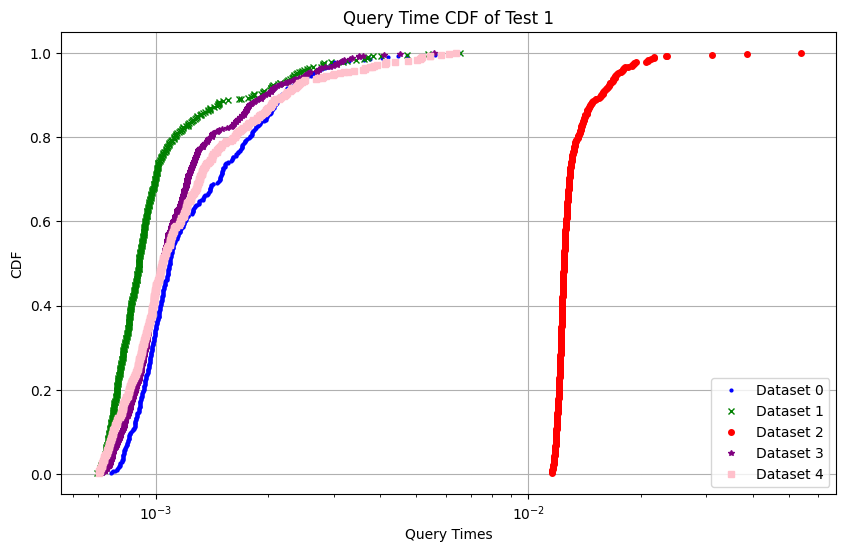

The 50th percentile of Test 2 with 0 is 0.001485586166381836
The 99th percentile of Test 2 with 0 is 0.0018822503089904782
The 50th percentile of Test 2 with 1 is 0.0014559030532836914
The 99th percentile of Test 2 with 1 is 0.0020049166679382315
The 50th percentile of Test 2 with 2 is 0.012417435646057129
The 99th percentile of Test 2 with 2 is 0.02015174627304077
The 50th percentile of Test 2 with 3 is 0.0015584230422973633
The 99th percentile of Test 2 with 3 is 0.004014444351196288
The 50th percentile of Test 2 with 4 is 0.0014859437942504883
The 99th percentile of Test 2 with 4 is 0.0030197620391845697


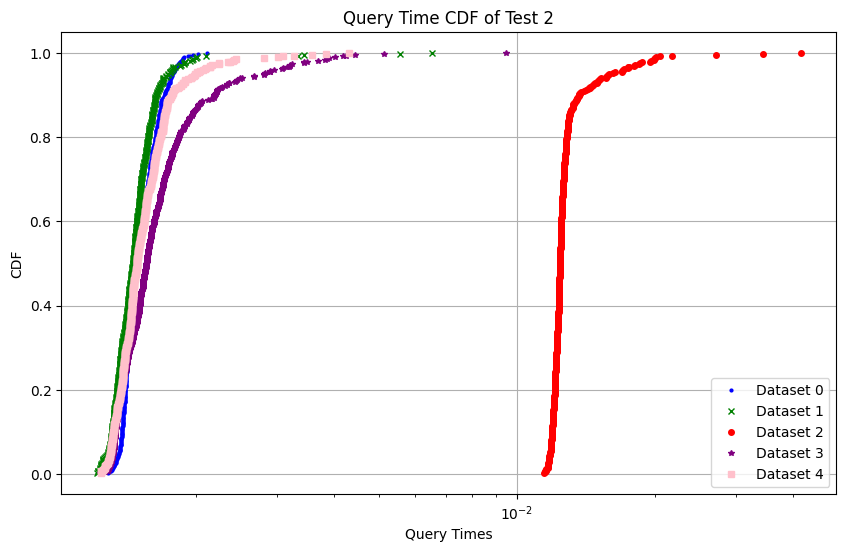

The 50th percentile of Test 3 with 0 is 0.0003190040588378906
The 99th percentile of Test 3 with 0 is 0.00047093391418457004
The 50th percentile of Test 3 with 1 is 0.00018787384033203125
The 99th percentile of Test 3 with 1 is 0.0003233551979064941
The 50th percentile of Test 3 with 2 is 0.012159109115600586
The 99th percentile of Test 3 with 2 is 0.020403800010681147
The 50th percentile of Test 3 with 3 is 0.00029599666595458984
The 99th percentile of Test 3 with 3 is 0.00210789918899536
The 50th percentile of Test 3 with 4 is 0.00026488304138183594
The 99th percentile of Test 3 with 4 is 0.0005672049522399902


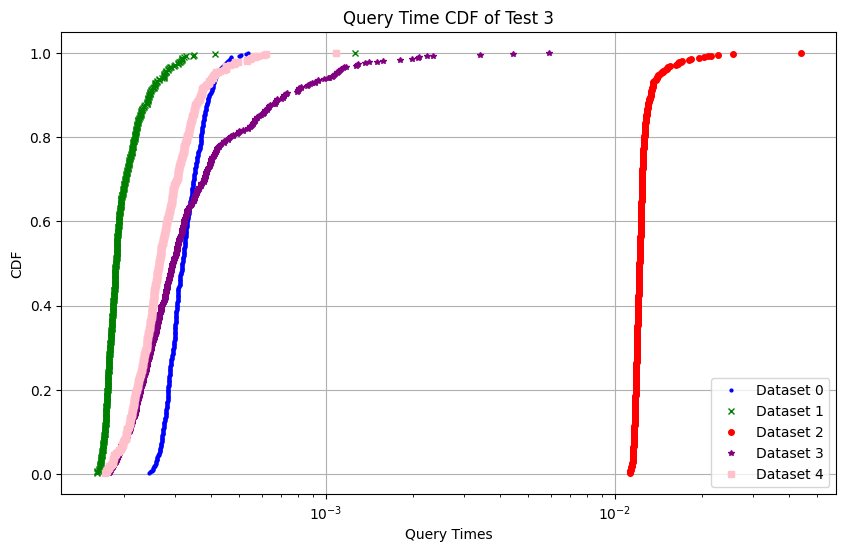

In [19]:
#########################################################
# charts
#########################################################
plotter([test1_data, test1opt1_data, test1opt2_data, test1opt3_data, test1opt4_data], "Test 1")
plotter([test2_data, test2opt1_data, test2opt2_data, test2opt3_data, test2opt4_data], "Test 2")
plotter([test3_data, test3opt1_data, test3opt2_data, test3opt3_data, test3opt4_data], "Test 3")